# Knn 数字分类

In [ ]:
import numpy as np     #导入numpy工具包
from os import listdir   #使用listdir模块，用于访问本地文件
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve,roc_curve,auc #计算PR和RPC

In [ ]:
## 定义imgTovector函数
#将加载的32*32的图片矩阵展开成一列向量
def imgTovector(fileName):
    # 定义返回的矩阵，大小为1*1024
    retVector = np.zeros([1024],int)
    # 打开包含32*32大小的数字文件
    f = open(fileName)
    # 读取文件的所有行,readlines()从文件中一行一行地读数据，返回一个列表
    lines = f.readlines()
    # 遍历文件所有行, 并将0-1数字存放在retVector中
    for i in range(32):
       for j in range(32):
           retVector[i*32+j] = lines[i][j]
    return retVector
##定义加载训练数据的函数readDataSet

def readDataSet(path):
    fileList = listdir(path)    #获取文件夹下的所有文件
    numFiles = len(fileList)    #统计需要读取的文件的数目
    dataSet = np.zeros([numFiles,1024],int)    #用于存放所有的数字文件
    hwLabels = np.zeros([numFiles])#用于存放对应的标签(与神经网络的不同)
    for i in range(numFiles):      #遍历所有的文件
        filePath = fileList[i]     #获取文件名称/路径
        digit = int(filePath.split('_')[0])   #通过文件名获取标签
        hwLabels[i] = digit        #直接存放数字，并非one-hot向量
        dataSet[i] = imgTovector(path +'/'+filePath)    #读取文件内容
    return dataSet,hwLabels

In [2]:
#调用以上定义的两个函数加载数据，将训练的图片存放在train_dataSet中，对应的标签（文件名中的有用信息标签）存放在train_hwLabels中
train_dataSet, train_hwLabels = readDataSet('trainingDigits')

##构建KNN分类器
knn = neighbors.KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
knn.fit(train_dataSet, train_hwLabels)

,n_neighbors,3
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [3]:
#加载测试集
dataSet,hwLabels = readDataSet('testDigits')
acc=knn.score(dataSet,hwLabels)
print(acc)
##使用构建好的KNN分类器对测试集进行预测，并计算预测的错误率
res = knn.predict(dataSet)  #对测试集进行预测
error_num = np.sum(res != hwLabels) #统计分类错误的数目
num = len(dataSet)          #测试集的数目
print("Total num:",num," Wrong num:", error_num,"  WrongRate:",error_num / float(num))

0.9873150105708245
Total num: 946  Wrong num: 12   WrongRate: 0.012684989429175475


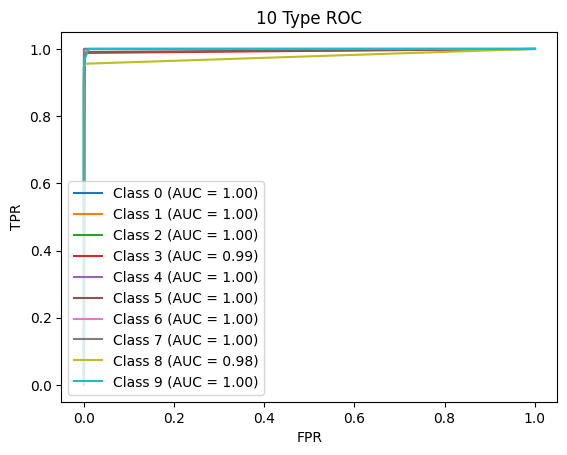

In [5]:
# 10个数字各自ROC曲线
for i in range(10):
    y_pred = knn.predict_proba(dataSet)
    fpr, tpr, threshold = roc_curve((hwLabels == i).astype(int), y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Class %d (AUC = %0.2f)' % (i, roc_auc))

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("10 Type ROC")
plt.legend(loc="lower left")  # 放左下角
plt.show()

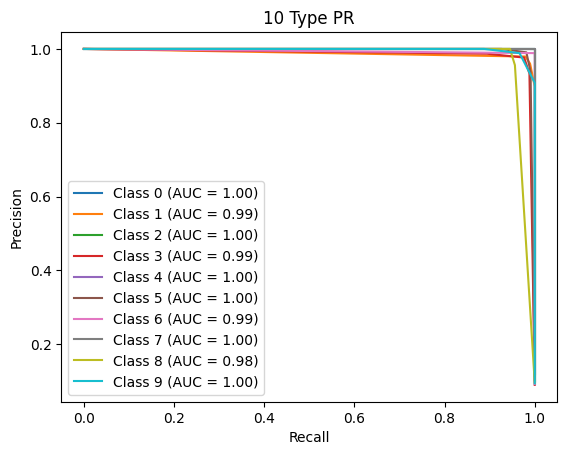

In [6]:
# 10个数字各自的PR曲线
for i in range(10):
    y_pred = knn.predict_proba(dataSet)
    precision, recall, _ = precision_recall_curve((hwLabels == i).astype(int), y_pred[:, i])  # 计算精度、召回率、threshold
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label='Class %d (AUC = %0.2f)' % (i, pr_auc))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("10 Type PR")
plt.legend(loc="lower left")  # 放左下角
plt.show()